# Text Visualization - Metin Görselleştirme

In [2]:
import pandas as pd
data = pd.read_csv("train.tsv", sep = "\t")

In [3]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [5]:
#buyuk-kucuk donusumu
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [6]:
#noktalama işaretleri
data['Phrase'] = data['Phrase'].str.replace('[^\w\s]','')

In [7]:
#sayılar
data['Phrase'] = data['Phrase'].str.replace('\d','')

In [8]:
#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\halil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
#seyreklerin silinmesi
sil = pd.Series(' '.join(data['Phrase']).split()).value_counts()[-1000:]
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [10]:
#lemmi
from textblob import Word
#nltk.download('wordnet')
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [11]:
data["Phrase"].head(10)

0    series escapade demonstrating adage good goose...
1       series escapade demonstrating adage good goose
2                                               series
3                                                     
4                                               series
5              escapade demonstrating adage good goose
6                                                     
7              escapade demonstrating adage good goose
8                                             escapade
9                       demonstrating adage good goose
Name: Phrase, dtype: object

## Terim Frekansı

In [12]:
tf1= (data["Phrase"].head(80000)).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [13]:
tf1.columns = ["words","tf"]

In [14]:
tf1.head()

,words,tf
0,good,1107.0
1,amuses,10.0
2,story,1410.0
3,occasionally,102.0
4,series,143.0


In [15]:
tf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9665 entries, 0 to 9664
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   9665 non-null   object 
 1   tf      9665 non-null   float64
dtypes: float64(1), object(1)
memory usage: 151.1+ KB


In [16]:
tf1.nunique()

words    9665
tf        340
dtype: int64

## Barplot - Sütun Grafiği

In [17]:
a = tf1[tf1["tf"]>1000]

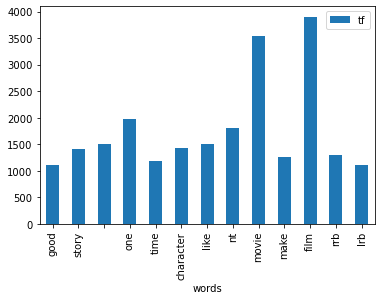

In [18]:
a.plot.bar(x ="words", y ="tf");

## Wordcloud - Kelime Bulutu

In [19]:
!pip install wordcloud

In [20]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [21]:
text = data["Phrase"][0]

In [22]:
wordcloud = WordCloud().generate(text)
# ?wordcloud

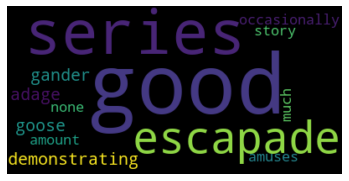

In [23]:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

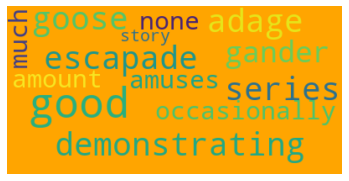

In [24]:
wordcloud = WordCloud(background_color="orange", max_font_size=50, max_words=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [25]:
# Oluştrulan wordcloud u png olarak kaydetme işlemi yaptık.
wordcloud.to_file("kelime_bulutu.png");

In [26]:
# Tüm Metinler için

text1 = " ".join(i for i in data.Phrase)
# text1

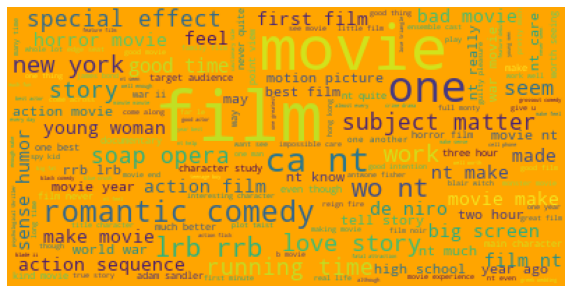

In [27]:
wordcloud = WordCloud(background_color="orange", max_font_size=50).generate(text1)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation="antialiased")
plt.axis("off")
plt.show()
wordcloud.to_file("kelime_bulutu1.png");

## Şablonlara Göre Word Cloud

In [28]:
tr_mask = np.array(Image.open("tr.png"))

In [29]:
tr_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

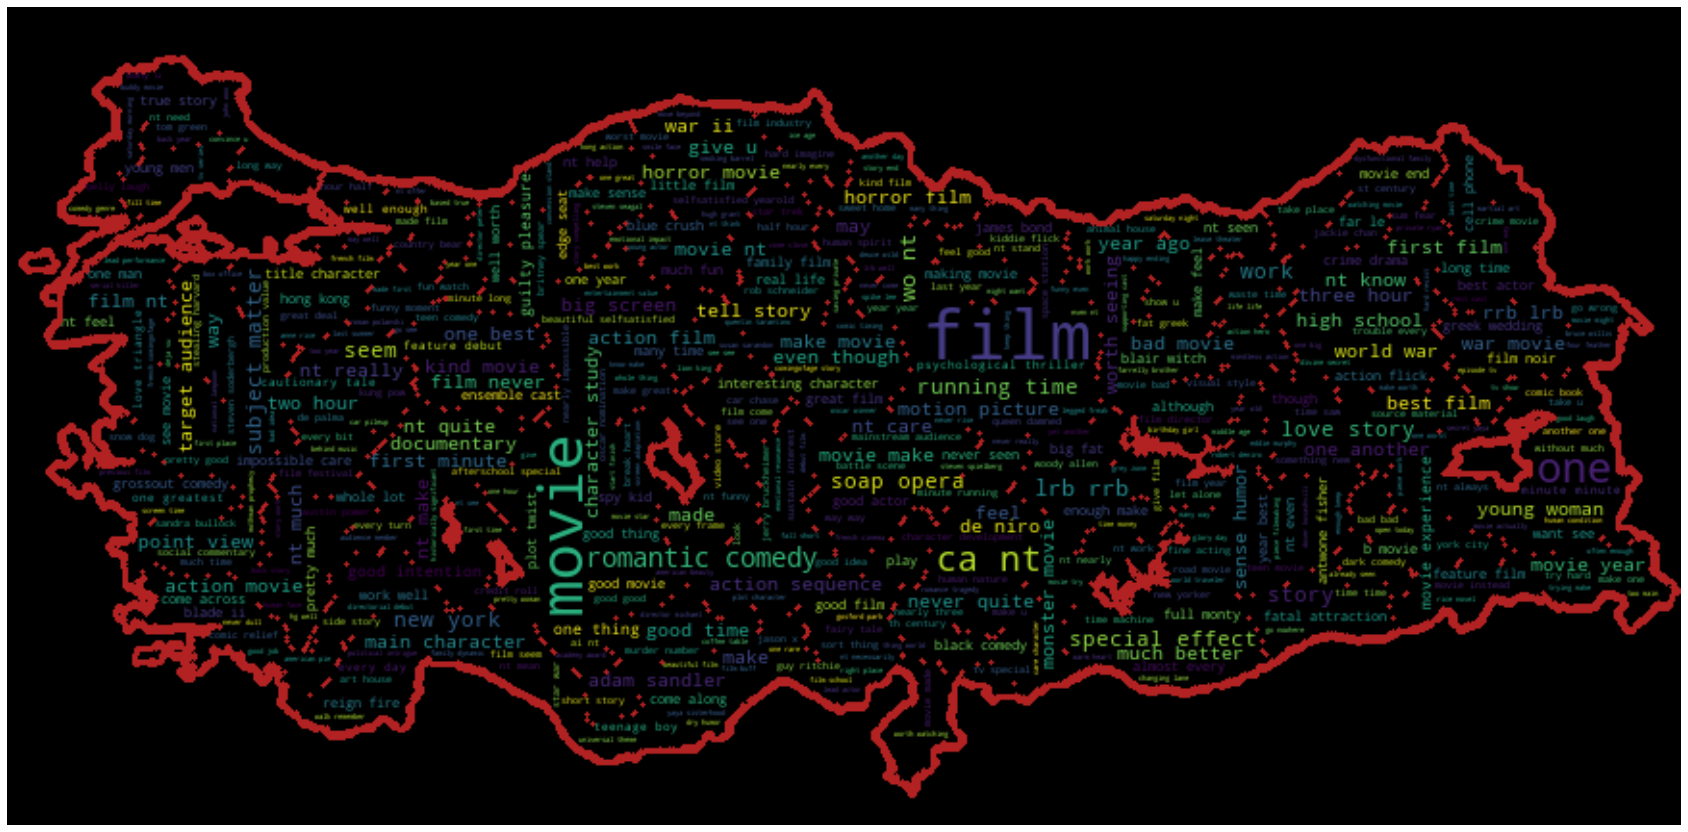

In [30]:
wordcloud = WordCloud(background_color="black",
                      max_words = 1000,
                      mask=tr_mask,
                      contour_width = 3,
                      contour_color="firebrick").generate(text1)
plt.figure(figsize=[30,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud.to_file("tr1.png");